## Data cleaning and analysis of data science jobs posted in glassdoor

Context: This is a dataset of data science job posts in glassdoor.The data was scrapped from glassdoor's website

Dataset link: https://www.kaggle.com/datasets/rashikrahmanpritom/data-science-job-posting-on-glassdoor/download?datasetVersionNumber=1

### Objective:
The objective of this data analysis project is to clean and preprocess job postings data from Glasdoor, enabling accurate analysis and insights for recruitment trends, salary trends and job market analysis. The dataset contains 15 columns , each row represent a single job posted on the sight with the following attributes:
1. job title
2. Salary estimate
3. Job Description
4. Rting
5. Company Name
6. Location
7. Headquarters
8. Size
9. year Founded -company
10. Type of ownership -company
11. Industry
12. Sector
13. Revenue
14. Competitors

## Project Outline
1. load dataset 
2. Data Exploration
3. Data Cleaning
4. Data Visualization and extracting key insights

In [1]:
# loading necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# load dataset
jobs=pd.read_csv(r'C:\Users\Hp\Downloads\archive (88)\Uncleaned_DS_jobs.csv')
jobs.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


## Data Exploration

In [3]:
# shape of the dataset
jobs.shape

(672, 15)

In [4]:
# view columns in our dataset
print(jobs.columns.to_list())

['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors']


In [5]:
# check for null values
print(jobs.isnull().sum())

index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64


In [6]:
# check nfor duplicates
print(jobs.duplicated().any())

False


In [7]:
# check for column data types
print(jobs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB
None


In [8]:
# create a copy of data frame before commencing our cleaning process
jobs_copy=jobs.copy()

In [9]:
#remove all columns not relevant for our analysis
jobs=jobs.drop(['index','Competitors','Type of ownership','Headquarters'],axis=1)
jobs.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Industry,Sector,Revenue
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY",1001 to 5000 employees,1993,Insurance Carriers,Insurance,Unknown / Non-Applicable
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA",5001 to 10000 employees,1968,Research & Development,Business Services,$1 to $2 billion (USD)
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA",1001 to 5000 employees,1981,Consulting,Business Services,$100 to $500 million (USD)
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA",501 to 1000 employees,2000,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD)
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY",51 to 200 employees,1998,Advertising & Marketing,Business Services,Unknown / Non-Applicable


In [10]:
# checking distribution of non numerical columns
print(jobs['Job Title'].value_counts())

Data Scientist                                            337
Data Engineer                                              26
Senior Data Scientist                                      19
Machine Learning Engineer                                  16
Data Analyst                                               12
                                                         ... 
Data Science Instructor                                     1
Business Data Analyst                                       1
Purification Scientist                                      1
Data Engineer, Enterprise Analytics                         1
AI/ML - Machine Learning Scientist, Siri Understanding      1
Name: Job Title, Length: 172, dtype: int64


In [11]:
print(jobs['Company Name'].value_counts())

Hatch Data Inc                      12
Maxar Technologies\n3.5             12
Tempus Labs\n3.3                    11
AstraZeneca\n4.0                    10
Klaviyo\n4.8                         8
                                    ..
Better Hire\n4.0                     1
Rincon Research Corporation\n4.2     1
Descript\n4.3                        1
Trace Data\n3.9                      1
ChaTeck Incorporated\n5.0            1
Name: Company Name, Length: 432, dtype: int64


In [12]:
# company name needs to be cleaned since it has rating as part nof the name
print(jobs['Company Name'].value_counts())

Hatch Data Inc                      12
Maxar Technologies\n3.5             12
Tempus Labs\n3.3                    11
AstraZeneca\n4.0                    10
Klaviyo\n4.8                         8
                                    ..
Better Hire\n4.0                     1
Rincon Research Corporation\n4.2     1
Descript\n4.3                        1
Trace Data\n3.9                      1
ChaTeck Incorporated\n5.0            1
Name: Company Name, Length: 432, dtype: int64


In [13]:
# location and state can be separated to different columns
print(jobs['Location'].value_counts())

San Francisco, CA    69
New York, NY         50
Washington, DC       26
Boston, MA           24
Chicago, IL          22
                     ..
Oshkosh, WI           1
Culver City, CA       1
Lake Oswego, OR       1
New Orleans, LA       1
Irwindale, CA         1
Name: Location, Length: 207, dtype: int64


## Data Cleaning

### salary estimate column
inorder to perform meaningful analysis with this column we shall clean this column by breaking it into 3 columns namely minimum  salary, maximum salary and average salary for each data science job listed

In [14]:
import re
pattern='(\d+)' # extract only values in a capture group
def clean_salary(col):
    return re.findall(pattern,col)
jobs['Salary Estimate']=jobs['Salary Estimate'].apply(clean_salary)
jobs['min_salary']=jobs['Salary Estimate'].str[0].astype('int') # minimum salary
jobs['max_salary']=jobs['Salary Estimate'].str[1].astype('int') # maximum salary
jobs['average_salary']=(jobs['min_salary']+jobs['max_salary'])/2 # Average salary

In [15]:
jobs.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Industry,Sector,Revenue,min_salary,max_salary,average_salary
0,Sr Data Scientist,"[137, 171]",Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY",1001 to 5000 employees,1993,Insurance Carriers,Insurance,Unknown / Non-Applicable,137,171,154.0
1,Data Scientist,"[137, 171]","Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA",5001 to 10000 employees,1968,Research & Development,Business Services,$1 to $2 billion (USD),137,171,154.0
2,Data Scientist,"[137, 171]",Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA",1001 to 5000 employees,1981,Consulting,Business Services,$100 to $500 million (USD),137,171,154.0
3,Data Scientist,"[137, 171]",JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA",501 to 1000 employees,2000,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),137,171,154.0
4,Data Scientist,"[137, 171]",Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY",51 to 200 employees,1998,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137,171,154.0


In [16]:
# we can drop salary estimate column 
jobs=jobs.drop('Salary Estimate',axis=1)

### Cleaning Job Description column

In [17]:
jobs['Job Description'][1]

"Secure our Nation, Ignite your Future\n\nJoin the top Information Technology and Analytic professionals in the industry to make invaluable contributions to our national security on a daily basis. In this innovative, self-contained, Big Data environment, the ManTech team is responsible for everything from infrastructure, to application development, to data science, to advanced analytics and beyond. The team is diverse, the questions are thought-provoking, and the opportunities for growth and advancement are numerous\n\nThe successful candidate will possess a diverse range of data-focused skills and experience, both technical and analytical. They will have a strong desire and capability for problem solving, data analysis and troubleshooting, analytical thinking, and experimentation.\n\nDuties, Tasks & Responsibilities\nWorking with large, complex, and disparate data sets\nDesigning and implementing innovative ways to analyze and exploit the Sponsors data holdings\nResearching and report

we shall extract most common data science skills into separate columns namely python,sql,tableau,power bi,aws,hadoop,spark,excel,bigdata , power bi

In [18]:
# convert our job description to lower case
jobs['Job Description']=jobs['Job Description'].str.lower()

In [19]:
jobs['Job Description'][0]

"description\n\nthe senior data scientist is responsible for defining, building, and improving statistical models to improve business processes and outcomes in one or more healthcare domains such as clinical, enrollment, claims, and finance. as part of the broader analytics team, data scientist will gather and analyze data to solve and address complex business problems and evaluate scenarios to make predictions on future outcomes and work with the business to communicate and support decision-making. this position requires strong analytical skills and experience in analytic methods including multivariate regressions, hierarchical linear models, regression trees, clustering methods and other complex statistical techniques.\n\nduties & responsibilities:\n\n• develops advanced statistical models to predict, quantify or forecast various operational and performance metrics in multiple healthcare domains\n• investigates, recommends, and initiates acquisition of new data resources from interna

In [20]:
# check for 'python' in job description
def python_skill(col):
    if 'python' in col:
        return 1
    else:
        return 0
# check for 'sql' in job description column
def sql_skill(col):
    if 'sql' in col:
        return 1
    else:
        return 0
# check for 'hadoop' in job description column
def hadoop_skill(col):
    if 'hadoop' in col:
        return 1
    else:
        return 0
# check for 'tableau' in job description
def tableau_skill(col):
    if 'tableau' in col:
        return 1
    else:
        return 0
# check for 'power_bi' skill    
def powerbi_skill(col):
    if 'power bi' in col:
        return 1
    elif 'power_bi' in col:
        return 1
    else:
        return 0
# check for 'excel' skill
def excel_skill(col):
    if 'excel' in col:
        return 1
    else:
        return 0
# check for 'spark'
def spark_skill(col):
    if 'spark' in col:
        return 1
    else:
        return 0
# check for aws
def aws_skill(col):
    if 'aws' in col:
        return 1
    else:
        return 0
def mathematics_skill(col):
    if 'math' in col:
        return 1
    elif 'statistics' in col:
        return 1
    else:
        return 0

In [21]:
jobs['python']=jobs['Job Description'].apply(python_skill)
jobs['sql']=jobs['Job Description'].apply(sql_skill)
jobs['hadoop']=jobs['Job Description'].apply(hadoop_skill)
jobs['tableau']=jobs['Job Description'].apply(tableau_skill)
jobs['power_bi']=jobs['Job Description'].apply(powerbi_skill)
jobs['excel']=jobs['Job Description'].apply(excel_skill)
jobs['spark']=jobs['Job Description'].apply(spark_skill)
jobs['aws']=jobs['Job Description'].apply(aws_skill)
jobs['maths/statistics']=jobs['Job Description'].apply(mathematics_skill)

In [22]:
jobs.head()

,Job Title,Job Description,Rating,Company Name,Location,Size,Founded,Industry,Sector,Revenue,...,average_salary,python,sql,hadoop,tableau,power_bi,excel,spark,aws,maths/statistics
0,Sr Data Scientist,description\n\nthe senior data scientist is re...,3.1,Healthfirst\n3.1,"New York, NY",1001 to 5000 employees,1993,Insurance Carriers,Insurance,Unknown / Non-Applicable,...,154.0,0,0,0,0,0,0,0,1,1
1,Data Scientist,"secure our nation, ignite your future\n\njoin ...",4.2,ManTech\n4.2,"Chantilly, VA",5001 to 10000 employees,1968,Research & Development,Business Services,$1 to $2 billion (USD),...,154.0,0,1,1,0,0,0,0,0,1
2,Data Scientist,overview\n\n\nanalysis group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA",1001 to 5000 employees,1981,Consulting,Business Services,$100 to $500 million (USD),...,154.0,1,0,0,0,0,1,0,1,1
3,Data Scientist,job description:\n\ndo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA",501 to 1000 employees,2000,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),...,154.0,1,1,0,0,0,1,0,1,0
4,Data Scientist,data scientist\naffinity solutions / marketing...,2.9,Affinity Solutions\n2.9,"New York, NY",51 to 200 employees,1998,Advertising & Marketing,Business Services,Unknown / Non-Applicable,...,154.0,1,1,0,0,0,1,0,0,1


### cleaning company name

In [23]:
pattern='[^0-9]+'
def clean_company_name(col):
    return re.findall(pattern,col)[0].strip('\n')
jobs['Company Name']=jobs['Company Name'].apply(clean_company_name)

In [24]:
jobs.head()

,Job Title,Job Description,Rating,Company Name,Location,Size,Founded,Industry,Sector,Revenue,...,average_salary,python,sql,hadoop,tableau,power_bi,excel,spark,aws,maths/statistics
0,Sr Data Scientist,description\n\nthe senior data scientist is re...,3.1,Healthfirst,"New York, NY",1001 to 5000 employees,1993,Insurance Carriers,Insurance,Unknown / Non-Applicable,...,154.0,0,0,0,0,0,0,0,1,1
1,Data Scientist,"secure our nation, ignite your future\n\njoin ...",4.2,ManTech,"Chantilly, VA",5001 to 10000 employees,1968,Research & Development,Business Services,$1 to $2 billion (USD),...,154.0,0,1,1,0,0,0,0,0,1
2,Data Scientist,overview\n\n\nanalysis group is one of the lar...,3.8,Analysis Group,"Boston, MA",1001 to 5000 employees,1981,Consulting,Business Services,$100 to $500 million (USD),...,154.0,1,0,0,0,0,1,0,1,1
3,Data Scientist,job description:\n\ndo you have a passion for ...,3.5,INFICON,"Newton, MA",501 to 1000 employees,2000,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),...,154.0,1,1,0,0,0,1,0,1,0
4,Data Scientist,data scientist\naffinity solutions / marketing...,2.9,Affinity Solutions,"New York, NY",51 to 200 employees,1998,Advertising & Marketing,Business Services,Unknown / Non-Applicable,...,154.0,1,1,0,0,0,1,0,0,1


### cleaning job title

In [25]:
jobs['Job Title']=jobs['Job Title'].str.lower()

### Cleaning Location column 

In [26]:
# we will split the location from the state
def clean_location(loc):
    location=loc.split(',')
    return location
jobs['State']=jobs['Location'].apply(clean_location).str[1]
jobs['Location']=jobs['Location'].apply(clean_location).str[0]

## Most In demand technologies/skills for data science jobs

In [27]:
skills=['python','sql','hadoop','tableau','power_bi','excel','spark','aws','maths/statistics']
df=jobs[skills]
df.head()

,python,sql,hadoop,tableau,power_bi,excel,spark,aws,maths/statistics
0,0,0,0,0,0,0,0,1,1
1,0,1,1,0,0,0,0,0,1
2,1,0,0,0,0,1,0,1,1
3,1,1,0,0,0,1,0,1,0
4,1,1,0,0,0,1,0,0,1


In [28]:
# Transpose the DataFrame to simplify analysis 
df=df.T
df

,0,1,2,3,4,5,6,7,8,9,...,662,663,664,665,666,667,668,669,670,671
python,0,0,1,1,1,1,1,1,0,1,...,0,1,1,1,1,1,0,1,1,1
sql,0,1,0,1,1,1,0,1,0,1,...,0,1,1,1,1,1,0,1,1,1
hadoop,0,1,0,0,0,1,0,0,0,0,...,0,1,1,0,0,1,0,1,1,0
tableau,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
power_bi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
excel,0,0,1,1,1,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1
spark,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
aws,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
maths/statistics,1,1,1,0,1,0,1,1,0,1,...,1,1,1,1,1,1,0,1,1,1


Text(0.5, 1.0, 'Most marketable skills for Data jobs')

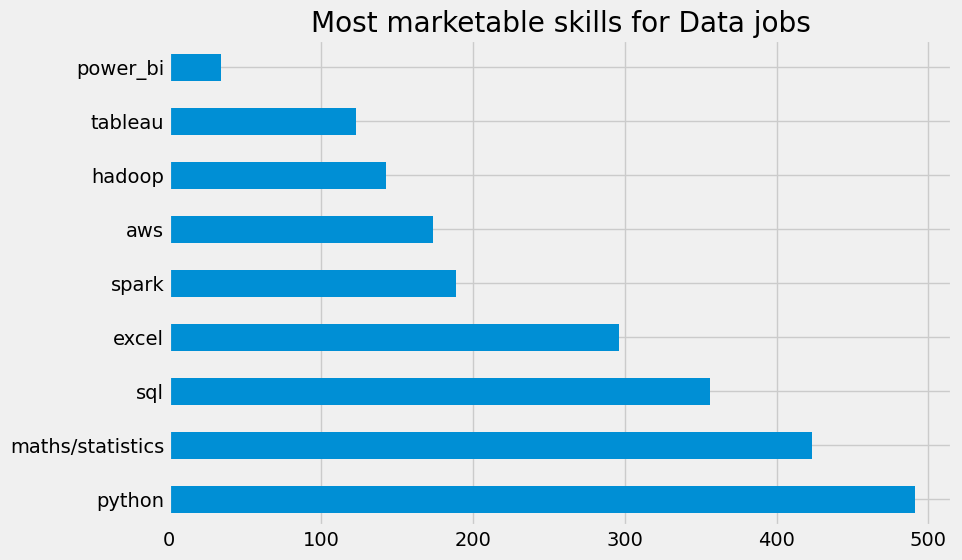

In [29]:
# add total (number of entries) for every row columns to our df 
plt.figure(figsize=(9,6))
df.sum(axis=1).sort_values(ascending=False).plot.barh()
plt.title('Most marketable skills for Data jobs')

## Salary Trends

In [33]:
# top 10 jobs with highest Average salary
top_20=jobs.sort_values(by='average_salary',ascending=False).head(10)
top_20[['Job Title','Company Name','Location','average_salary']]

,Job Title,Company Name,Location,average_salary
522,"manager, field application scientist, southeast",x Genomics,Raleigh,271.5
528,data scientist,Aptive,Washington,271.5
509,"real world science, data scientist",AstraZeneca,Wilmington,271.5
510,data scientist,Creative Circle,United States,271.5
511,data scientist(s)/machine learning engineer,Blue Horizon Tek Solutions,New York,271.5
512,senior data scientist,Maxar Technologies,Herndon,271.5
513,data scientist,Sharpedge Solutions Inc,Seattle,271.5
514,data scientist,Maxar Technologies,Herndon,271.5
515,data scientist,Alaka`ina Foundation Family of Companies,Fort Sam Houston,271.5
516,engineer - computer scientist - research compu...,Southwest Research Institute,Oklahoma City,271.5


## Conclusion

While the list of skills extracted from Job description is not exhaustive (we've only captured most common skill requirement for data jobs), The  analysis conducted  shows that Python language is the most demanded skill in the data industry. This is because of python's simplicity making it the go to programming language for many beginners venturing in data industry. Mathematics and statistics are the second most important skill in the data industry, this is because machine learning algorithms, and performing analyses and discovering insights from data require math.   SQL and Excel come in 3rd and 4th place respectively

In [34]:
!jupyter nbconvert --to webpdf --allow-chromium-download Data_cleaning_glassdoor_data_science_jobs.ipynb

[NbConvertApp] Converting notebook Data_cleaning_glassdoor_data_science_jobs.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 253888 bytes to Data_cleaning_glassdoor_data_science_jobs.pdf
